# BRENDA filtering workflow 

clone files from the git lab link below

http://bioinf1.scmb.uq.edu.au/gabe/expat_bench

Currently, the expat_bench repository hasn't been updated with my scripts. To run through 

The main scripts for auto filtering used in snakemake pipeline are:

- auto_filtering.py
- config.yaml 
- snakefile 

# Step 1: Removing outliers

Due to the way that tags are assigned, some entries will be given a long string of InterPro tags and are not grouped with other entries. 

This function allows those outliers to be removed based on a limit that the user sets. As a result, entries that have been assigned many tags and are likely to be unrelated to many other enzyme entries can be removed.

The remove_outliers method in auto_filtering.py does this task.

# Step 2: Grouping rows in matrix 
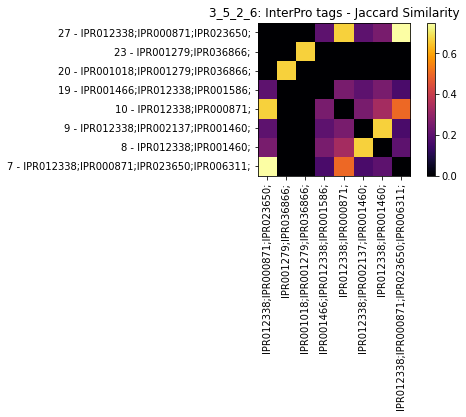

Using Jaccard similarity, a score between 0 and 1 is assigned between each InterPro tag group present in the enzyme group.

The number in front of the row before the tag represents the number of entries that have been assigned this tag. E.g. in row 0 there are 27 sequences with that particular tag

The user can set a particular threshold that they desire e.g. 0.5.
The method then groups each row to other IP tags that are similar. For example, row 0 would be grouped with row 4 and row 7 as these both have similarity scores above 0.5

Therefore, the number of entries grouped with row 0 would be 44 entries

This is repeated for every row in the matrix and these tags are stored in a list with IP tags in a list as well.

e.g. for row 0, the group of similar IP tags would be represented as seen below as they share at least 50% of the same IP tags to one another 

[[IPR012338;IPR000871;IPR023650;, IPR012338;IPR000871;, IPR012338;IPR023650;IPR006311;]]

The method calc_jaccard_matrix_auto walks through this process



# Step 3: filtering based on protein families

In config.yaml under the Auto Filtering Parametrs heading, the user specifies both the threshold and the minimum number of entries (i.e. removing outliers).

Using the previous example for row 0, the method will record any protein family annotation present for any entry that has been assigned the IP tags [[IPR012338;IPR000871;IPR023650;, IPR012338;IPR000871;, IPR012338;IPR023650;IPR006311;]].

For Beta Lactamases that these IP tags belong to, the three protein families present were Class A, Class C and Class D. 

Using that set of protein families, it grabs any entry in the entire enzyme classification group that has been annotated with one of those families to ensure that any entry that was missed is included.  

## Step 4: Create filtered FASTA file and infer a tree

using the binfpy package, auto_filtering.py will create a FASTA file and using snakemake it will construct an alignment file using MAFFT and then infer a tree using FastTree 


## Graphical representation

For a graphicalrepresentation of Jaccard heatmaps, the notebook graphical_filtering_v2.ipynb can be used. 

It uses filtering_scripts_v2.py to go through the same process as the autofiltering without actually constructing the FASTA or trees. 

This allows the user to visualise the heatmap but allows the user to look at specific annotation columns that they're interested in the filtered group. Therefore, you can check if an annotation of interest is still present after filtering has occured. 